In [ ]:
# git branch


In [ ]:
# ライブラリのimport

# NumPy用ライブラリ
# matplotlib日本語化対応ライブラリのインポート

# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt
import numpy as np

# pandas用ライブラリ
import pandas as pd

# seaborn
import seaborn as sns

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode="fixed")
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams["figure.figsize"] = (6, 6)
# 方眼表示ON
plt.rcParams["axes.grid"] = True
# データフレームでの表示精度
pd.options.display.float_format = "{:.3f}".format
# データフレームですべての項目を表示
pd.set_option("display.max_columns", None)


import arviz as az
import pymc as pm

WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
/usr/local/lib/python3.12/site-packages/arviz/__init__.py:39: FutureWarning: 
ArviZ is undergoing a major refactor to improve flexibility and extensibility while maintaining a user-friendly interface.
Some upcoming changes may be backward incompatible.
For details and migration guidance, visit: https://python.arviz.org/en/latest/user_guide/migration_guide.html
  warn(


In [ ]:
# アイリスデータセットの読み込み
df = sns.load_dataset("iris")

# 先頭5件の確認
display(df.head())

#  speciesの分布確認
df["species"].value_counts()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0xffff8a7e8bf0>,
 [Text(4.0, 0, '4.0'),
  Text(4.2, 0, '4.2'),
  Text(4.4, 0, '4.4'),
  Text(4.6000000000000005, 0, '4.6'),
  Text(4.800000000000001, 0, '4.8'),
  Text(5.000000000000001, 0, '5.0'),
  Text(5.200000000000001, 0, '5.2'),
  Text(5.400000000000001, 0, '5.4'),
  Text(5.600000000000001, 0, '5.6'),
  Text(5.800000000000002, 0, '5.8'),
  Text(6.000000000000002, 0, '6.0')])

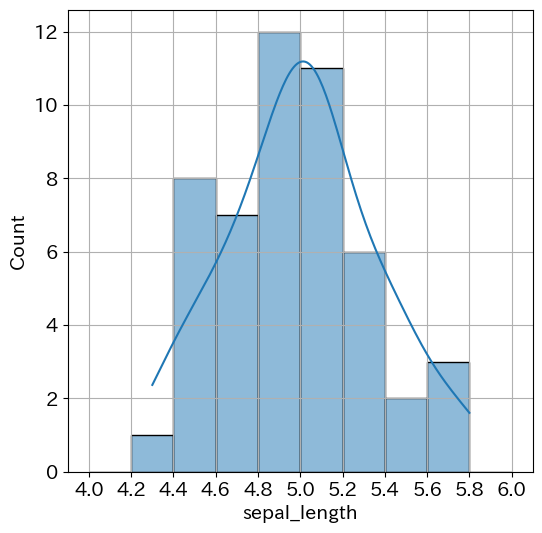

In [ ]:
df1 = df.query("species == 'setosa'")
bins = np.arange(4.0, 6.2, 0.2)
sns.histplot(df1, x="sepal_length", bins=bins, kde=True)
plt.xticks(bins)

In [ ]:
s1 = df1["sepal_length"]
X = s1.values
print(s1.describe())
print(X)

count   50.000
mean     5.006
std      0.352
min      4.300
25%      4.800
50%      5.000
75%      5.200
max      5.800
Name: sepal_length, dtype: float64
[5.100 4.900 4.700 4.600 5.000 5.400 4.600 5.000 4.400 4.900 5.400 4.800
 4.800 4.300 5.800 5.700 5.400 5.100 5.700 5.100 5.400 5.100 4.600 5.100
 4.800 5.000 5.000 5.200 5.200 4.700 4.800 5.400 5.200 5.500 4.900 5.000
 5.500 4.900 4.400 5.100 5.000 4.500 4.400 5.000 5.100 4.800 5.100 4.600
 5.300 5.000]


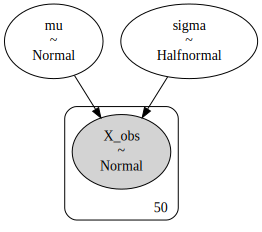

In [ ]:
model1 = pm.Model()
with model1:
    mu = pm.Normal("mu", mu=0.0, sigma=10.0)
    sigma = pm.HalfNormal("sigma", sigma=10.0)
    X_obs = pm.Normal("X_obs", mu=mu, sigma=sigma, observed=X)

g = pm.model_to_graphviz(model1)
display(g)

In [ ]:
with model1:
    idata1 = pm.sample(random_seed=42)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


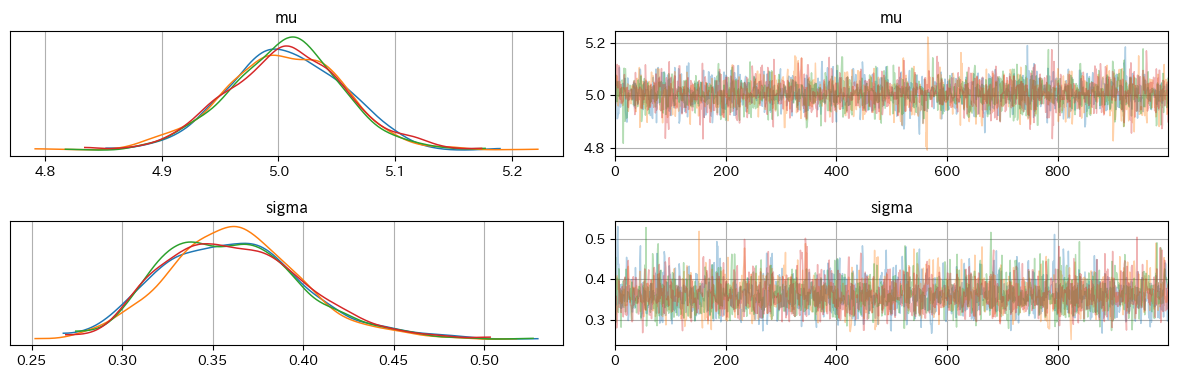

In [ ]:
az.plot_trace(idata1, compact=False)
plt.tight_layout()

In [58]:
idata1

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'sigma'}>],
      dtype=object)

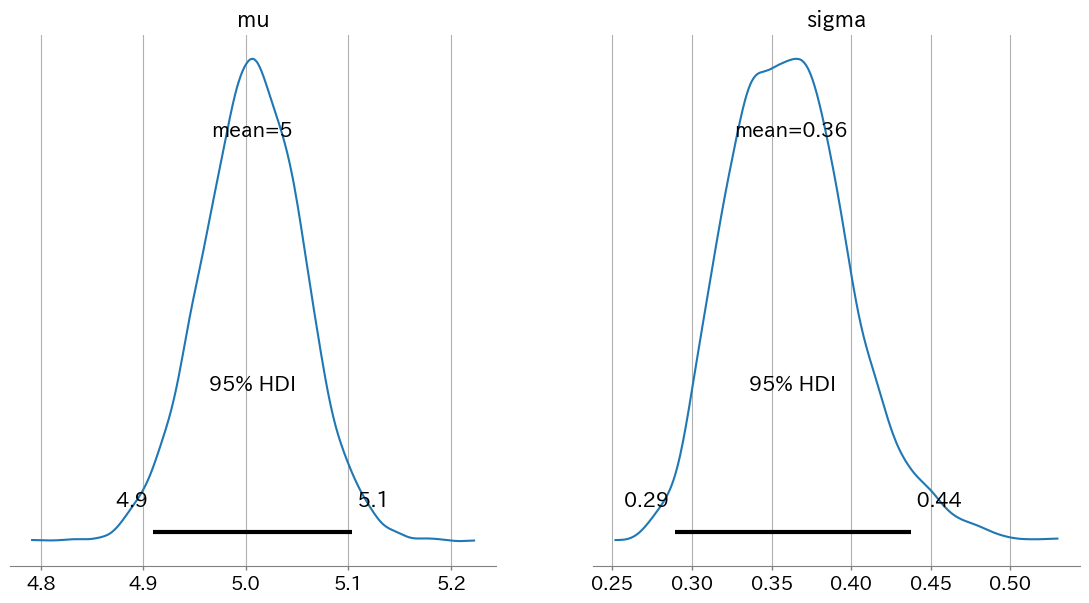

In [59]:
az.plot_posterior(idata1, hdi_prob=0.95)

Text(0, 0.5, 'がく片の幅')

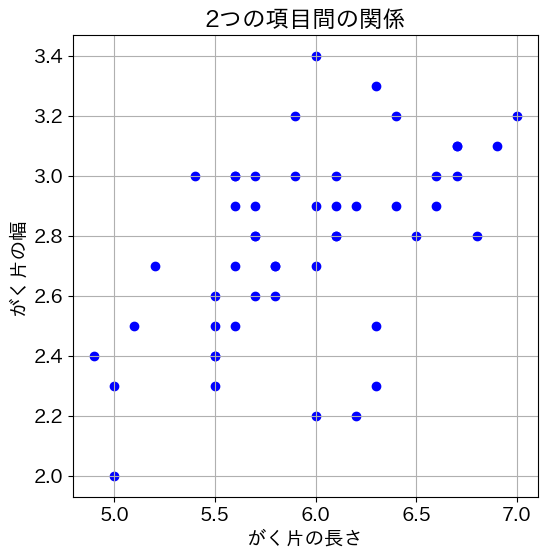

In [ ]:
df2 = df.query("species == 'versicolor'")
X = df2["sepal_length"]
Y = df2["sepal_width"]

plt.title("2つの項目間の関係")
plt.scatter(X, Y, label="ベイズ推論で利用", c="b", marker="o")

plt.xlabel("がく片の長さ")
plt.ylabel("がく片の幅")

In [ ]:
model2 = pm.Model()

with model2:
    # X, Yの観測値をConstantDataとして定義
    X_data = pm.Data("X_data", X)
    Y_data = pm.Data("Y_data", Y)

    # 確率変数alpha、betaの定義(一次関数の傾きと切片)
    alpha = pm.Normal("alpha", mu=0.0, sigma=10.0)
    beta = pm.Normal("beta", mu=0.0, sigma=10.0)

    # 平均値muの計算
    mu = pm.Deterministic("mu", alpha * X_data + beta)

    # 誤差を示す確率変数epsilonの定義
    epsilon = pm.HalfNormal("epsilon", sigma=1.0)

    # 観測値を持つ確率変数はobsとして定義
    obs = pm.Normal("obs", mu=mu, sigma=epsilon, observed=Y_data)

In [ ]:
with model2:
    idata2 = pm.sample(random_seed=42)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


Output()

/usr/local/lib/python3.12/site-packages/pytensor/scalar/basic.py:3191: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/usr/local/lib/python3.12/site-packages/pytensor/scalar/basic.py:3297: RuntimeWarning: overflow encountered in scalar multiply
  return x * x
/usr/local/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 68 seconds.


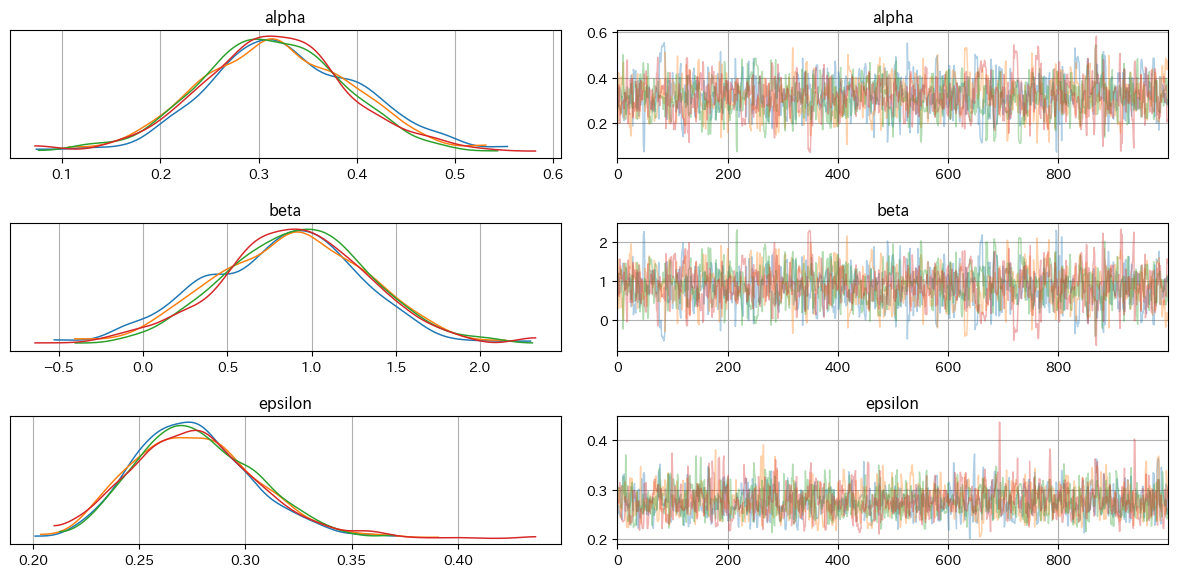

In [ ]:
az.plot_trace(idata2, compact=False, var_names=["alpha", "beta", "epsilon"])
plt.tight_layout()


array([<Axes: title={'center': 'alpha'}>,
       <Axes: title={'center': 'beta'}>,
       <Axes: title={'center': 'epsilon'}>], dtype=object)

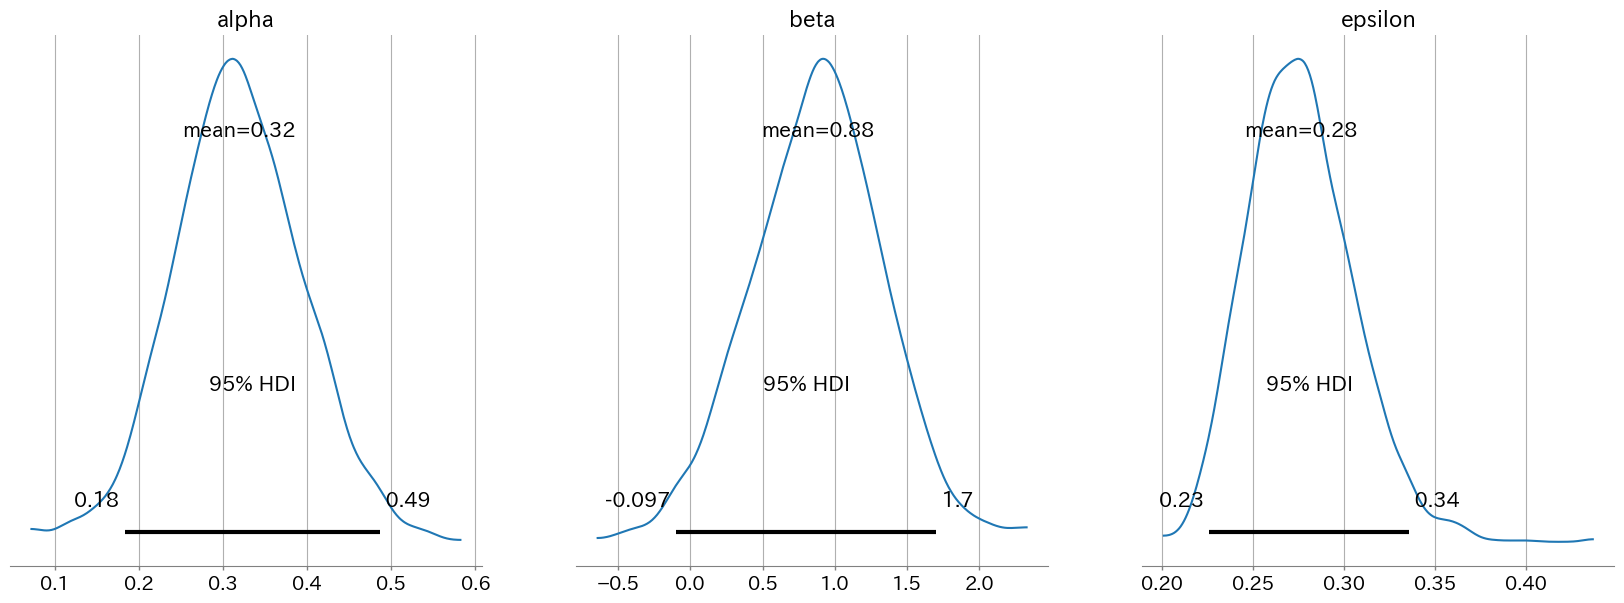

In [ ]:
az.plot_posterior(idata2, hdi_prob=0.95, var_names=["alpha", "beta", "epsilon"])

In [ ]:
# setosaの行のみ抽出
df0 = df.query('species == "setosa"')

# versicolorの行のみ抽出
df1 = df.query('species == "versicolor"')

# virginicaの行のみ抽出
df2 = df.query('species == "virginica"')

# 乱数により3個のインデックスを生成
import random

random.seed(42)
indexes = range(len(df0))
sample_indexes = random.sample(indexes, 3)

# df0, df1, df2のデータ数をそれぞれ3行にする
df0_sel = df0.iloc[sample_indexes]
df1_sel = df1.iloc[sample_indexes]
df2_sel = df2.iloc[sample_indexes]

# 全部連結して一つにする
df_sel = pd.concat([df0_sel, df1_sel, df2_sel]).reset_index(drop=True)
display(df_sel)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.000,3.500,1.300,0.300,setosa
1,5.000,3.400,1.500,0.200,setosa
2,4.900,3.000,1.400,0.200,setosa
3,5.500,2.600,4.400,1.200,versicolor
4,4.900,2.400,3.300,1.000,versicolor
5,6.400,3.200,4.500,1.500,versicolor
6,6.700,3.100,5.600,2.400,virginica
7,7.300,2.900,6.300,1.800,virginica
8,5.800,2.700,5.100,1.900,virginica


In [ ]:
X = df_sel["sepal_length"].values
Y = df_sel["sepal_width"].values
species = df_sel["species"]
cl = pd.Categorical(species).codes

# 結果確認
print(X)
print(Y)
print(species.values)
print(cl)

[5.000 5.000 4.900 5.500 4.900 6.400 6.700 7.300 5.800]
[3.500 3.400 3.000 2.600 2.400 3.200 3.100 2.900 2.700]
['setosa' 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica']
[0 0 0 1 1 1 2 2 2]


In [ ]:
model1 = pm.Model()
with model1:
    # 観測値をConstantDataとして定義
    X_data = pm.Data("X_data", X)
    Y_data = pm.Data("Y_data", Y)

    # クラス変数の定義
    cl_data = pm.Data("cl_data", cl)

    # 確率変数alphaの定義（階層ベイズ固有）
    a_mu = pm.Normal("a_mu", mu=0.0, sigma=10.0)
    a_sigma = pm.HalfNormal("a_sigma", sigma=10.0)
    alpha = pm.Normal("alpha", mu=a_mu, sigma=a_sigma, shape=(3,))
    print(alpha)

    # 確率変数betaの定義（階層ベイズ固有）
    b_mu = pm.Normal("b_mu", mu=0.0, sigma=10.0)
    b_sigma = pm.HalfNormal("b_sigma", sigma=10.0)
    beta = pm.Normal("beta", mu=b_mu, sigma=b_sigma, shape=(3,))

    # 誤差
    epsilon = pm.HalfNormal("epsilon", sigma=1.0)

    # muの値は、cl_dataに基づいてalpha, betaを選択
    mu = pm.Deterministic("mu", alpha[cl_data] * X_data + beta[cl_data])

    # mu,epsilonを用いて観測値の定義
    obs = pm.Normal("obs", mu=mu, sigma=epsilon, observed=Y_data)

alpha


In [74]:
with model1:
    idata1 = pm.sample(random_seed=42, target_accept=0.95)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_mu, a_sigma, alpha, b_mu, b_sigma, beta, epsilon]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 164 seconds.
There were 122 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


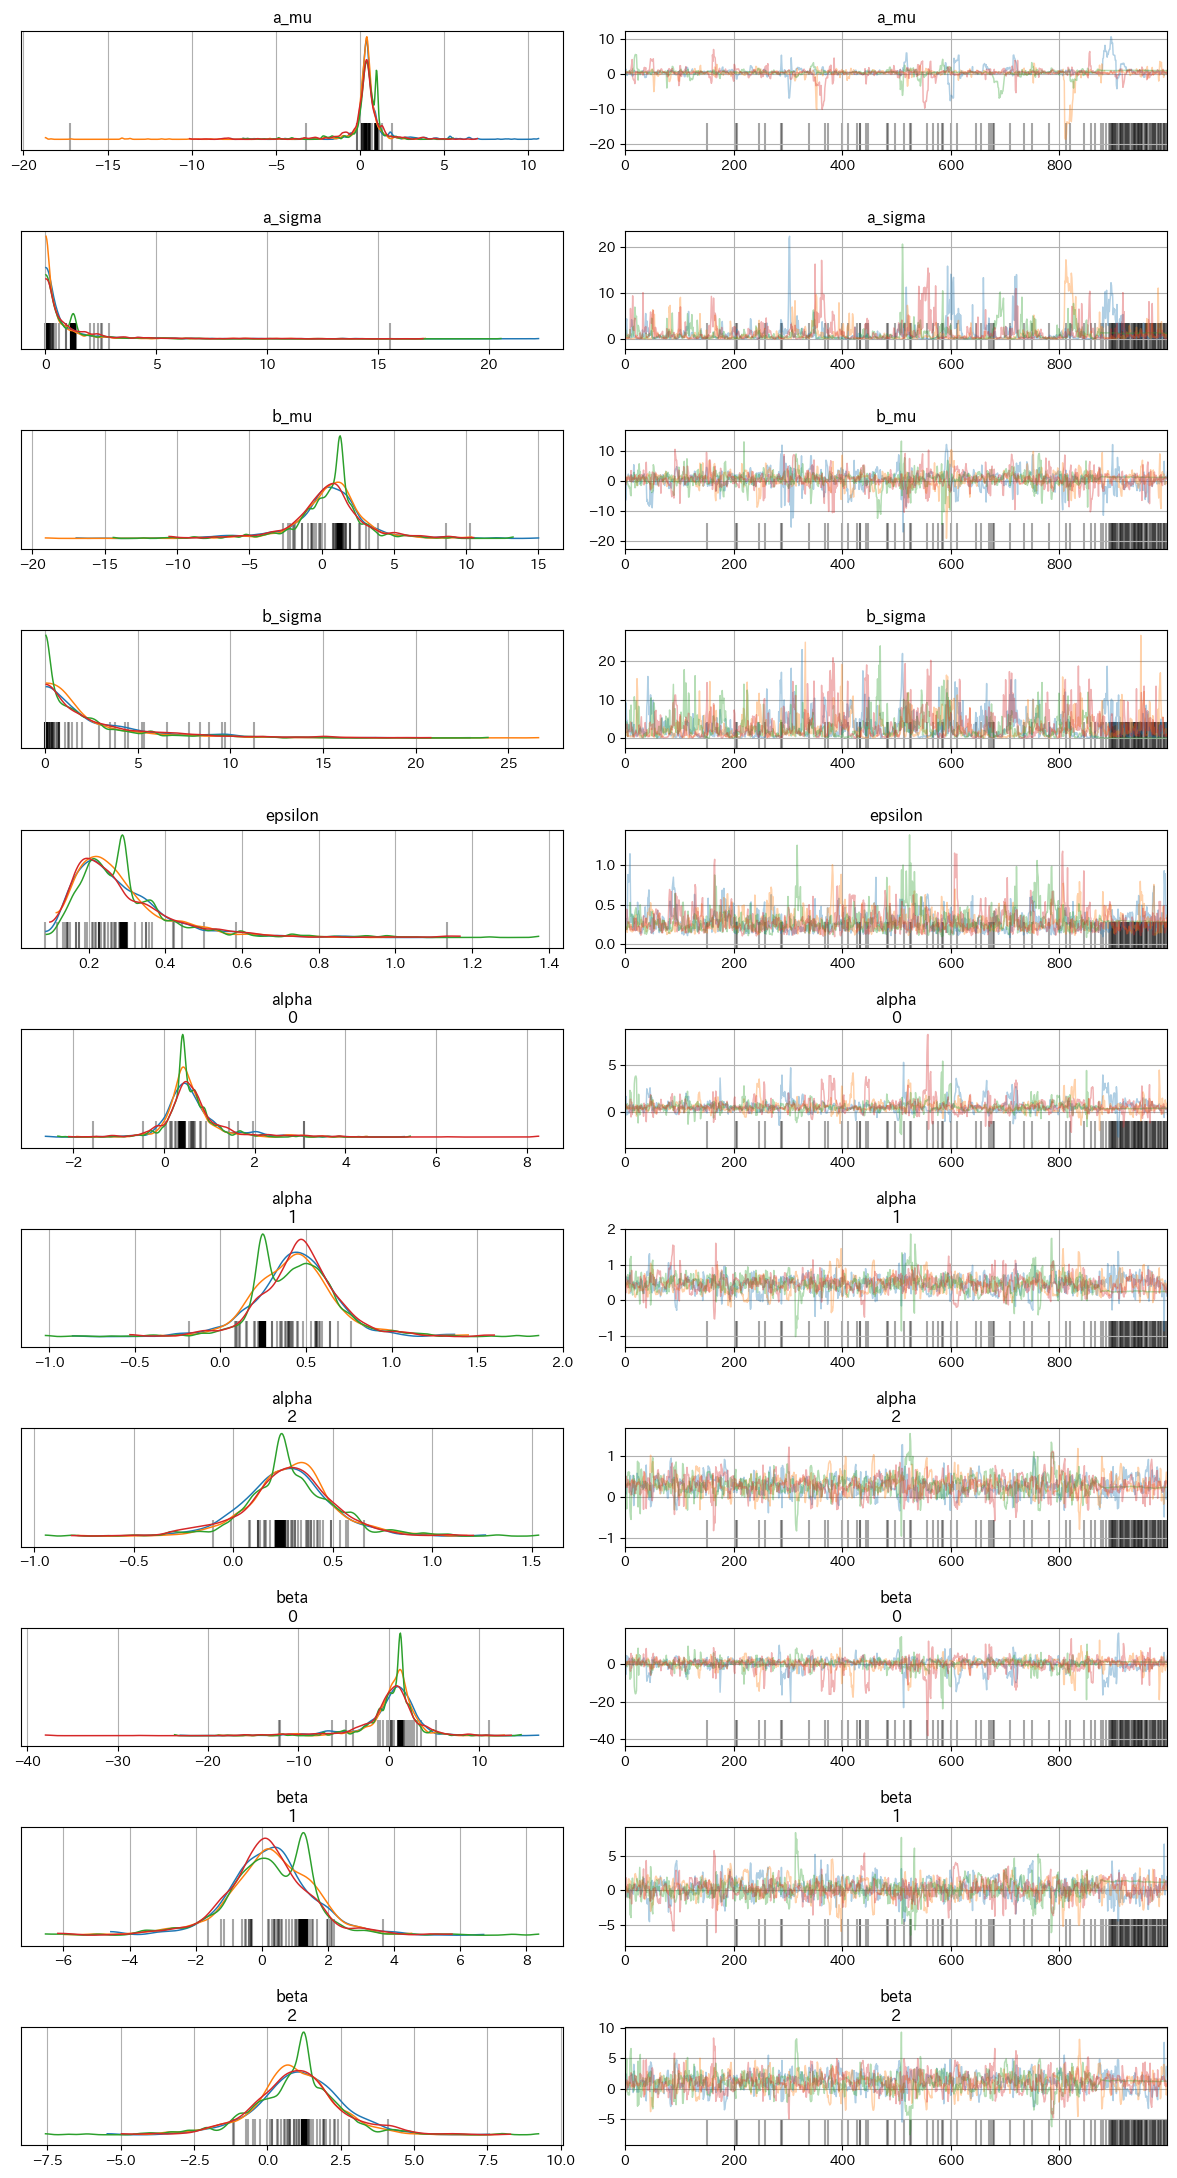

In [ ]:
az.plot_trace(
    idata1,
    compact=False,
    var_names=["a_mu", "a_sigma", "b_mu", "b_sigma", "epsilon", "alpha", "beta"],
)
plt.tight_layout()

In [ ]:
df2 = df.query("species != 'setosa'")
df2 = df2.reset_index(drop=True)
df2

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.000,3.200,4.700,1.400,versicolor
51,6.400,3.200,4.500,1.500,versicolor
52,6.900,3.100,4.900,1.500,versicolor
53,5.500,2.300,4.000,1.300,versicolor
54,6.500,2.800,4.600,1.500,versicolor
...,...,...,...,...,...
145,6.700,3.000,5.200,2.300,virginica
146,6.300,2.500,5.000,1.900,virginica
147,6.500,3.000,5.200,2.000,virginica
148,6.200,3.400,5.400,2.300,virginica


In [ ]:
X = df2["sepal_width"].values
X

array([3.200, 3.200, 3.100, 2.300, 2.800, 2.800, 3.300, 2.400, 2.900,
       2.700, 2.000, 3.000, 2.200, 2.900, 2.900, 3.100, 3.000, 2.700,
       2.200, 2.500, 3.200, 2.800, 2.500, 2.800, 2.900, 3.000, 2.800,
       3.000, 2.900, 2.600, 2.400, 2.400, 2.700, 2.700, 3.000, 3.400,
       3.100, 2.300, 3.000, 2.500, 2.600, 3.000, 2.600, 2.300, 2.700,
       3.000, 2.900, 2.900, 2.500, 2.800, 3.300, 2.700, 3.000, 2.900,
       3.000, 3.000, 2.500, 2.900, 2.500, 3.600, 3.200, 2.700, 3.000,
       2.500, 2.800, 3.200, 3.000, 3.800, 2.600, 2.200, 3.200, 2.800,
       2.800, 2.700, 3.300, 3.200, 2.800, 3.000, 2.800, 3.000, 2.800,
       3.800, 2.800, 2.800, 2.600, 3.000, 3.400, 3.100, 3.000, 3.100,
       3.100, 3.100, 2.700, 3.200, 3.300, 3.000, 2.500, 3.000, 3.400,
       3.000])

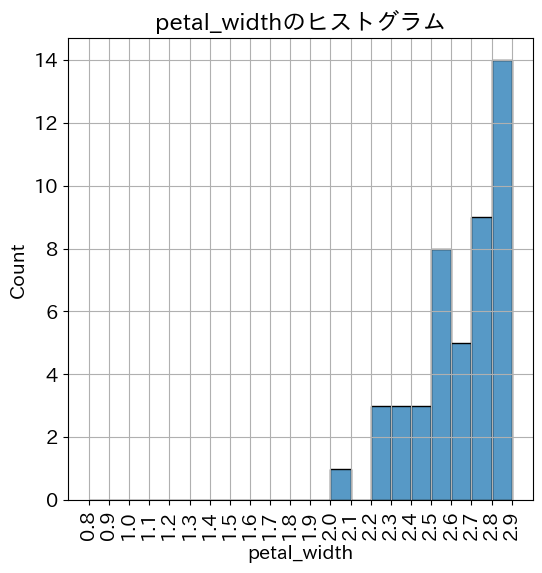

In [ ]:
bins = np.arange(0.8, 3.0, 0.1)
fig, ax = plt.subplots()
sns.histplot(bins=bins, x=X)
ax.set_xlabel("petal_width")
ax.xaxis.set_tick_params(rotation=90)
ax.set_title("petal_widthのヒストグラム")
ax.set_xticks(bins);

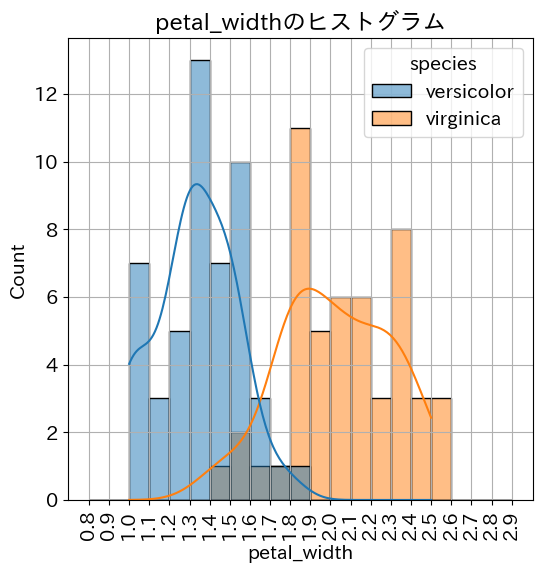

In [ ]:
bins = np.arange(0.8, 3.0, 0.1)
fig, ax = plt.subplots()
sns.histplot(data=df2, bins=bins, x="petal_width", hue="species", kde=True)
ax.xaxis.set_tick_params(rotation=90)
ax.set_title("petal_widthのヒストグラム")
ax.set_xticks(bins);

In [ ]:
# 何種類の正規分布モデルがあるか
n_components = 2

# 観測データ件数
N = X.shape

model1 = pm.Model()

with model1:
    # Xの観測値をDataとして定義
    X_data = pm.Data("X_data", X)

    # p: 潜在変数が1の値をとる確率
    p = pm.Uniform("p", lower=0.0, upper=1.0)

    # s: 潜在変数pの確率値をもとに0, 1のいずれかの値を返す
    s = pm.Bernoulli("s", p=p, shape=N)

    # mus: ２つの花の種類毎の平均値
    mus = pm.Normal("mus", mu=0.0, sigma=10.0, shape=n_components)

    # taus: 2つの花の種類毎のバラツキ
    # 標準偏差sigmasとの間にはtaus = 1/(sigmas*sigmas)の関係がある
    taus = pm.HalfNormal("taus", sigma=10.0, shape=n_components)

    # グラフ描画など分析でsigmasが必要なため、tausからsigmasを求めておく
    sigmas = pm.Deterministic("sigmas", 1 / pm.math.sqrt(taus))

    # 各観測値ごとに潜在変数からmuとtauを求める
    mu = pm.Deterministic("mu", mus[s])
    tau = pm.Deterministic("tau", taus[s])

    # 正規分布に従う確率変数X_obsの定義
    X_obs = pm.Normal("X_obs", mu=mu, tau=tau, observed=X_data)

AttributeError: 'list' object has no attribute 'to_numpy'

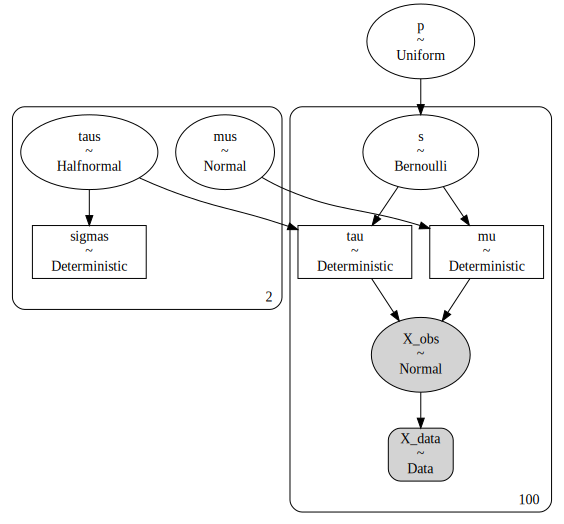

In [ ]:
g = pm.model_to_graphviz(model1)
display(g)

In [ ]:
with model1:
    idata1 = pm.sample(chains=1, draws=2000, target_accept=0.99, random_seed=42)

Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [p, mus, taus]
>BinaryGibbsMetropolis: [s]


Output()

In [ ]:
az.plot_trace(idata1, var_names=["p", "mus", "sigmas"], compact=False)
plt.tight_layout();

In [ ]:
plt.rcParams["figure.figsize"] = (6, 6)
az.plot_posterior(idata1, var_names=["p", "mus", "sigmas"])
plt.tight_layout();

In [ ]:
model_s = pm.Model()

with model_s:
    p_s_a = pm.Uniform("p_s_a", lower=0.0, upper=1.0)
    p_s_b = pm.Uniform("p_s_b", lower=0.0, upper=1.0)

    # 二項分布で確率モデルを定義
    obs_s_a = pm.Binomial("obs_s_a", n=40, p=p_s_a, observed=2)
    obs_s_b = pm.Binomial("obs_s_b", n=25, p=p_s_b, observed=2)

    delta_prob_s = pm.Deterministic("delta_prob_s", p_s_b - p_s_a)


In [12]:
with model_s:
    idata_s = pm.sample(random_seed=42, target_accept=0.95)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_s_a, p_s_b]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


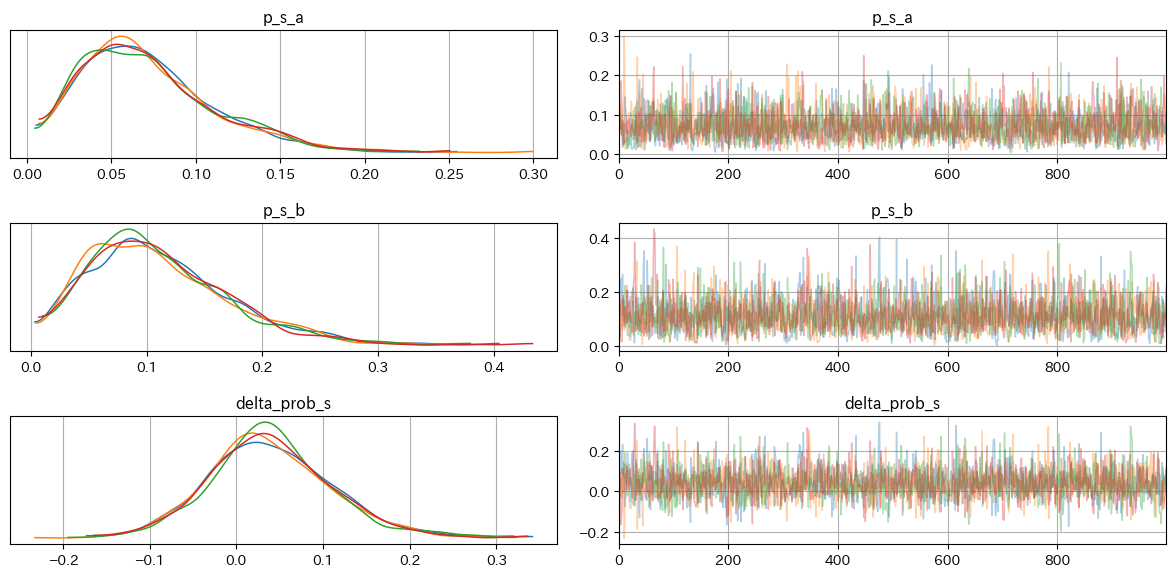

In [ ]:
az.plot_trace(idata_s, compact=False)
plt.tight_layout();

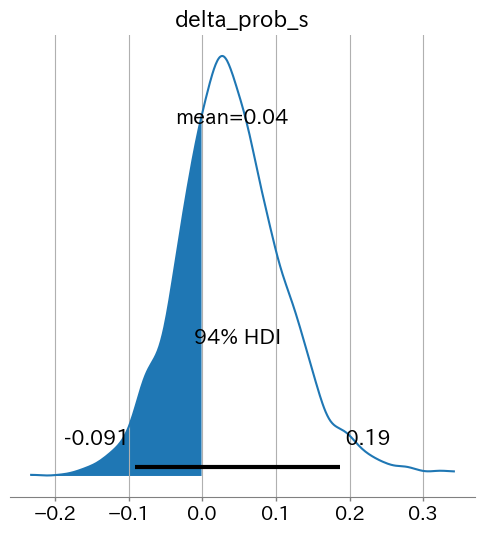

In [ ]:
ax = az.plot_posterior(idata_s, var_names=["delta_prob_s"])
xx, yy = ax.get_lines()[0].get_data()
ax.fill_between(xx[xx < 0], yy[xx < 0]);

In [ ]:
delta_prob_s = idata_s["posterior"].data_vars["delta_prob_s"]
delta_prob_s_values = delta_prob_s.values.reshape(-1)
print(delta_prob_s)


<xarray.DataArray 'delta_prob_s' (chain: 4, draw: 1000)> Size: 32kB
array([[ 0.069,  0.038,  0.059, ...,  0.049,  0.000,  0.128],
       [-0.002, -0.024, -0.010, ...,  0.068,  0.046,  0.027],
       [ 0.063, -0.077, -0.036, ...,  0.068,  0.033,  0.098],
       [ 0.129, -0.024,  0.098, ..., -0.032,  0.039,  0.107]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 8kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999


In [ ]:
n1_s = (delta_prob_s_values < 0).sum()
n_s = len(delta_prob_s_values)

n1_rates_s = n1_s / n_s
print(f"ベイズ推論によるp_b < p_aの確率: {n1_rates_s:.3f}")

ベイズ推論によるp_b < p_aの確率: 0.291


In [ ]:
model_y = pm.Model()
with model_y:
    p_y_a = pm.Uniform("p_y_a", lower=0.0, upper=1.0)
    p_y_b = pm.Uniform("p_y_b", lower=0.0, upper=1.0)

    obs_y_a = pm.Binomial("obs_y_a", n=1200, p=p_y_a, observed=60)
    obs_y_b = pm.Binomial("obs_y_b", n=1600, p=p_y_b, observed=110)

    delta_prob_y = pm.Deterministic("delta_prob_y", p_y_b - p_y_a)

    idata_y = pm.sample(random_seed=42, target_accept=0.95)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_y_a, p_y_b]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


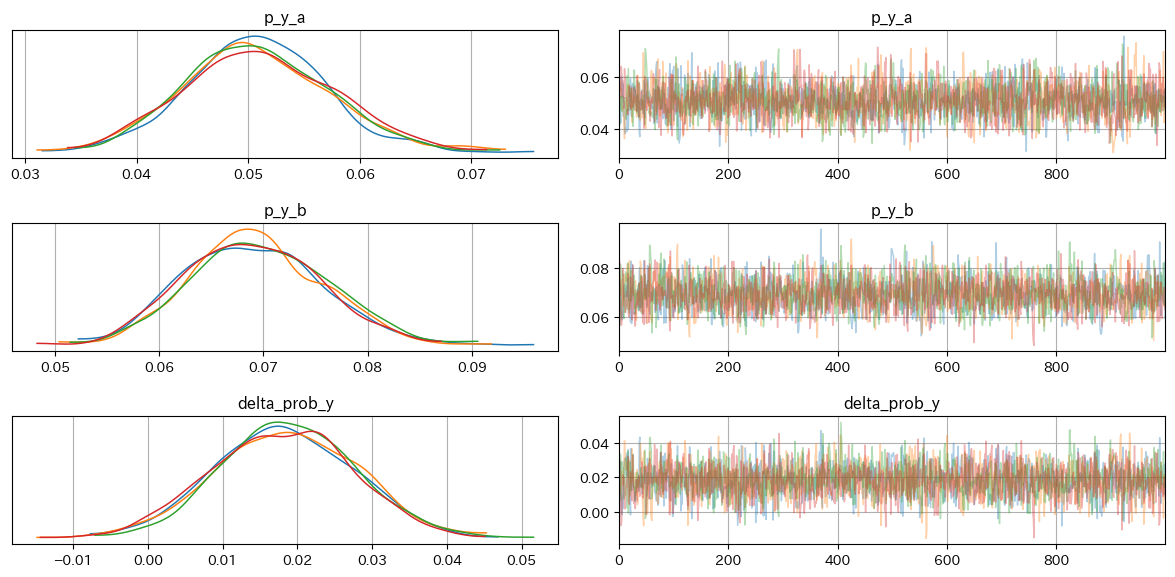

In [ ]:
az.plot_trace(idata_y, compact=False)
plt.tight_layout()
plt.show()

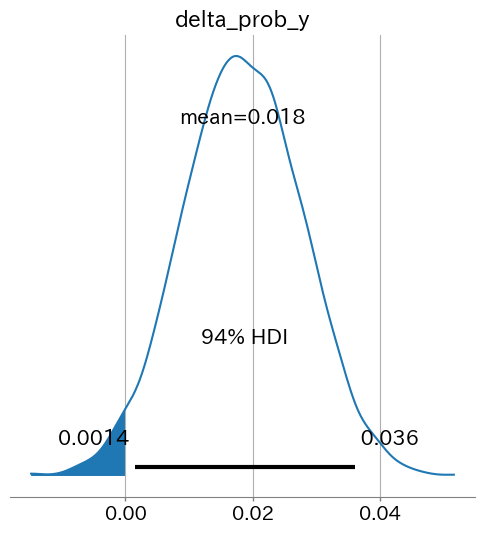

In [ ]:
# delta_prob_yの分布を可視化
ax = az.plot_posterior(idata_y, var_names=["delta_prob_y"])
xx, yy = ax.get_lines()[0].get_data()
ax.fill_between(xx[xx < 0], yy[xx < 0]);